In [1]:
# Imports

import matplotlib.pyplot as pyplot
import pandas as pd

import numpy as np
from numpy import unique, where

from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import string
import random

In [2]:
# Preparing the dataset
# User review grades for Animal Crossing on the scale of 1-10

cols = ["grade", "user_name", "text"] 
ug = pd.read_csv("user_reviews.csv", usecols=[cols[0]])
us = pd.read_csv("user_reviews.csv", usecols=[cols[1]])
ut = pd.read_csv("user_reviews.csv", usecols=[cols[2]])

# Each column is converted to a list for data storage in a dictionary.
user_grades = ug.to_numpy()
user_names = us.to_numpy()
user_reviews = ut.to_numpy()

# The descriptive statistics show a mean of a relative negative grade of 4.217406, with the upper
# and lower quartile grades being on the extremes of 10 and 0 respectively.
ug.describe()

,grade
count,2999.000000
mean,4.217406
std,4.349486
min,0.000000
25%,0.000000
50%,2.000000
75%,10.000000
max,10.000000


In [3]:
# A preview of the first 10 reviews in the dataset:
pd.read_csv("user_reviews.csv", usecols=cols).head(10)

,grade,user_name,text
0,4,mds27272,My gf started playing before me. No option to ...
1,5,lolo2178,"While the game itself is great, really relaxin..."
2,0,Roachant,My wife and I were looking forward to playing ...
3,0,Houndf,We need equal values and opportunities for all...
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...
5,0,tb726,The limitation of one island per Switch (not p...
6,0,Outryder86,I was very excited for this new installment of...
7,0,Subby89,It's 2020 and for some reason Nintendo has dec...
8,0,RocketRon,This is so annoying. Only one player has the a...
9,0,chankills,I purchased this game for my household (me and...


In [4]:
# Preprocessing review data:
    # Remove stopwords
    # Remove punctuation
    # Tokenize reviews
    # Lemmatize reviews

    # This process prepares for the text data's features to be defined based on tokens
    # of a sentence, rather than having a singular shape due to the entire sentence being
    # the one and only feature detected.
    
    # Before removing stopwords, I added a few game-related words that tend to appear
    # frequently across all reviews.
for x in ["game", "play", "nintendo", "animal crossing", "new horizons"]: STOPWORDS.add(x)

    # Preprocessing:
for i in range(len(user_reviews)):
        # Remove stop words:
    list_r = user_reviews[i][0].split()
    
    for w in list_r:
        if w.lower() in STOPWORDS:
            list_r.remove(w)
    
    rm_stopwords = " ".join(list_r)
    rm_stopwords = f"{user_names[i][0]} " + rm_stopwords
    
        # Remove punctuation:
    rm_punct = rm_stopwords.translate(str.maketrans('', '', string.punctuation))
    rm_punct = rm_punct.lower()

        # Tokenization:
    tokens = word_tokenize(rm_punct)

        # Lemmatization:
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [ lemmatizer.lemmatize(token) for token in tokens ]
    str_lemmatized = " ".join(lemmatized_tokens)
    
        # Update review data:
    user_reviews[i][0] = str_lemmatized

# https://chatgpt.com/share/6754dc92-68e8-8000-b862-3c0f819b46a1

In [5]:
# Split train and test data:

reviews_train, reviews_test = train_test_split(user_reviews, test_size=0.33, shuffle=True)
grades_train, grades_test = train_test_split(user_grades, test_size=0.33, shuffle=True)

In [6]:
    # Construct splits of training data as dictionaries:

user_dict_train1 = {t[0]:g[0] for (t, g) in zip(reviews_train, grades_train)}
    
    # Another dictionary for the testing data:
user_dict_test1 = {t[0]:g[0] for (t, g) in zip(reviews_test, grades_test)}

# References:
# https://chatgpt.com/share/6751ee43-f1fc-8000-a087-4d6475ddc698
# https://chatgpt.com/share/674fd269-9a7c-8000-addd-cc3fe5f6c560

In [7]:
# Sort training data into 2 clusters: 
# Positive reviews and Negative reviews

# Algorithm used: KMeans
# Code taken and modified from Lab 10 tutorial.

from sklearn.cluster import KMeans

# Define dataset
X = np.array(grades_train).reshape(-1, 1)

# Define the model
model = KMeans(n_clusters=2)

# Fit model and predict clusters
yhat = model.fit_predict(X)

# Retrieve unique clusters
clusters = unique(yhat)

	# Organize clusters as a list of lists representing each cluster
user_clusters = [[] for cluster in clusters] 						

for cluster in clusters:
		# All indices in the dataset such that the dataset element at that index is in the current cluster:
	row_ix = where(yhat == cluster)
		
		# Store these corresponding key:value pairs in the dataset dictionary into a cluster.
	for i in row_ix[0]:
		kv = list(user_dict_train1.items())[int(i)]
		user_clusters[int(cluster)].append(kv)

print("KMeans clusters:")
print("Cluster 1:", user_clusters[0])
print("Cluster 2:", user_clusters[1])



KMeans clusters:
Cluster 1: [('hime я не знаю как но эта игра меня не отпускает совсем', 0), ('roydonk epitomizes nintendo ’ s anti consumerism way game go save file local multiplayer archaic ridiculous purposely limit additional player way force people purchasing multiple switch they like enjoy game another person an additional player are limited being basically useless ha alsothis game epitomizes nintendo ’ s anti consumerism way game go save file local multiplayer archaic ridiculous purposely limit additional player way force people purchasing multiple switch they like enjoy game another person an additional player are limited being basically useless ha limited player single island save file per switch no cloud save file transfer you two switch bad you share a console want have separate island bad you want enjoy game a family member partner friend a single console bad a single technical limitation create major flaw this game issue is nintendo ’ s greed desire take advantage their bl

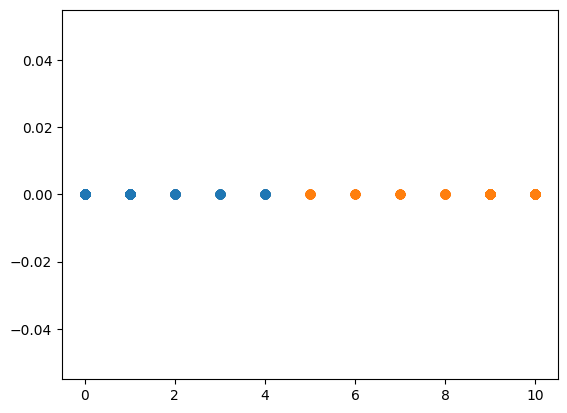

In [8]:
    # Create scatter plot of these samples:
for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], [np.zeros(len(X[row_ix, 0][0]))])

	# Show the plot:
pyplot.show()

# Lower cluster in terms of user grades: Negative reviews
# High cluster in terms of user grades: Positive reviews

In [9]:
# While dependent on the initialization, the KMeans algorithm tends to split
# the two clusters around 50-50% or 60-40%.

In [10]:
# Before PCA, here is a word cloud representation of the negative and
# positive review clusters for Kmeans clustering:

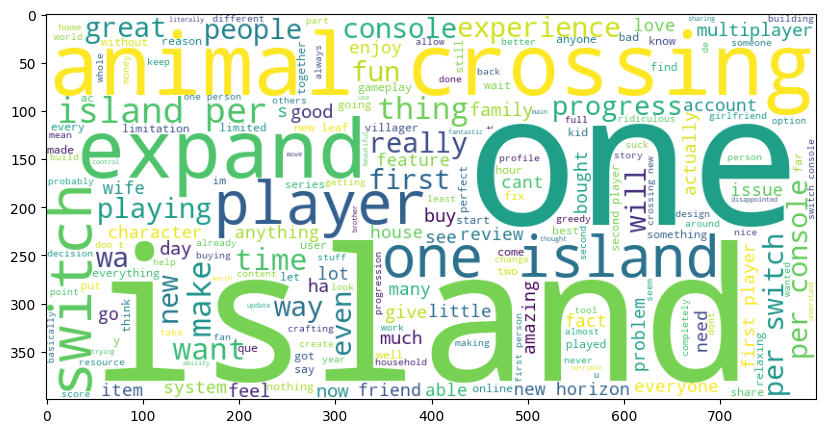

In [11]:
# Word cloud of most commonly used words for negative user reviews:
cluster0_user_review_text1 = " ".join(review[0] for review in user_clusters[0])

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(cluster0_user_review_text1)

# Display the generated word cloud
pyplot.figure(figsize=(10, 5))
pyplot.imshow(wc)
pyplot.show()

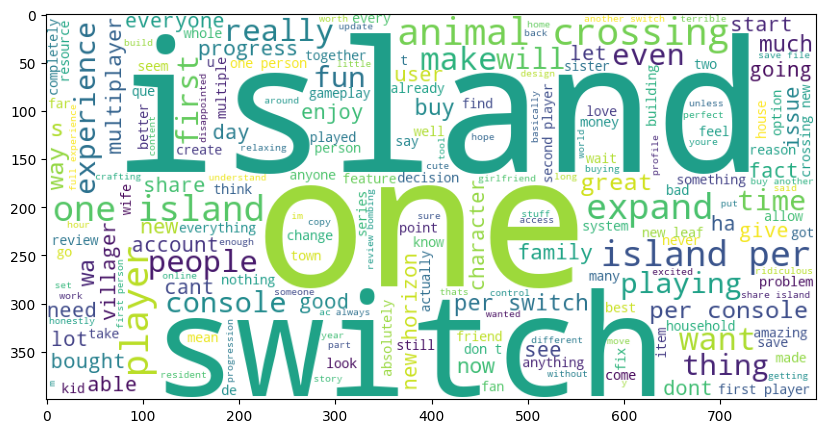

In [12]:
# Word cloud of most commonly used words for positive user reviews:
cluster1_user_review_text1 = " ".join(review[0] for review in user_clusters[1])

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(cluster1_user_review_text1)

# Display the generated word cloud
pyplot.figure(figsize=(10, 5))
pyplot.imshow(wc)
pyplot.show()

In [13]:
# When running Kmeans and the clustering was split scores (0-6) for the negative review cluster
# and (7-10) for the positive review cluster:

# The two clusters have similar most frequently occuring words that appear in the word cloud,
# but cluster 1 for the negative reviews has and extremely high frequency for "one" and "island",
# whereas cluster 2 for positive reviews contains a more even distribution across the words in its word cloud.

# I think that this difference between the two clusters became more apparent in this assignment
# than in Results: Stage 1 because of the added preprocessing steps of tokenization and lemmatization,
# which generalized the data more.  This I am thinking is due to less unique features/words and all words
# being reduced to their basic forms.

In [14]:
# Sort training data into 2 clusters: 
# Positive reviews and Negative reviews

# Algorithm used: Agglomerative clustering
# Code taken and modified from Lab 10 tutorial.

from sklearn.cluster import AgglomerativeClustering

# Define dataset
X = np.array(grades_train).reshape(-1, 1)

# Define the model
model = AgglomerativeClustering(n_clusters=2)

# Fit model and predict clusters
yhat = model.fit_predict(X)

# Retrieve unique clusters
clusters = unique(yhat)

	# Organize clusters as a list of lists representing each cluster
user_clusters = [[] for cluster in clusters] 						

for cluster in clusters:
		# All indices in the dataset such that the dataset element at that index is in the current cluster:
	row_ix = where(yhat == cluster)
		
		# Store these corresponding key:value pairs in the dataset dictionary into a cluster.
	for i in row_ix[0]:
		kv = list(user_dict_train1.items())[int(i)]
		user_clusters[int(cluster)].append(kv)

print("Agglomerative clusters:")
print("Negative reviews:", user_clusters[0])
print("Positive reviews:", user_clusters[1])



Agglomerative clusters:
Negative reviews: [('hime я не знаю как но эта игра меня не отпускает совсем', 0), ('roydonk epitomizes nintendo ’ s anti consumerism way game go save file local multiplayer archaic ridiculous purposely limit additional player way force people purchasing multiple switch they like enjoy game another person an additional player are limited being basically useless ha alsothis game epitomizes nintendo ’ s anti consumerism way game go save file local multiplayer archaic ridiculous purposely limit additional player way force people purchasing multiple switch they like enjoy game another person an additional player are limited being basically useless ha limited player single island save file per switch no cloud save file transfer you two switch bad you share a console want have separate island bad you want enjoy game a family member partner friend a single console bad a single technical limitation create major flaw this game issue is nintendo ’ s greed desire take adva

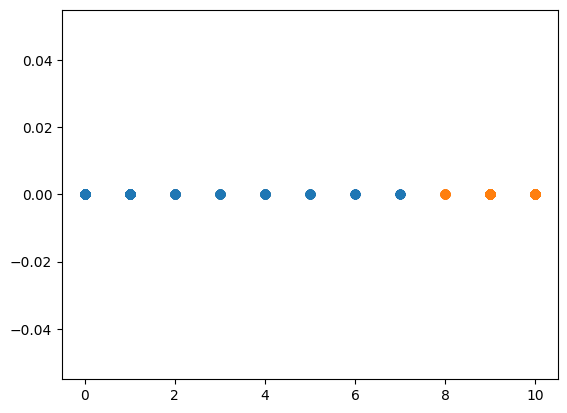

In [15]:
    # Create scatter plot of these samples:
for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], [np.zeros(len(X[row_ix, 0][0]))])

	# Show the plot:
pyplot.show()


# Lower cluster in terms of user grades: Negative reviews
# High cluster in terms of user grades: Positive reviews

In [16]:
# The agglomerative clustering places positive reviews as those with
# score 8-10, while all reviews grading the game lower than this are labelled
# as negative reviews.

In [17]:
# Before PCA, here is a word cloud representation of the negative and
# positive review clusters for agglomerative clustering:

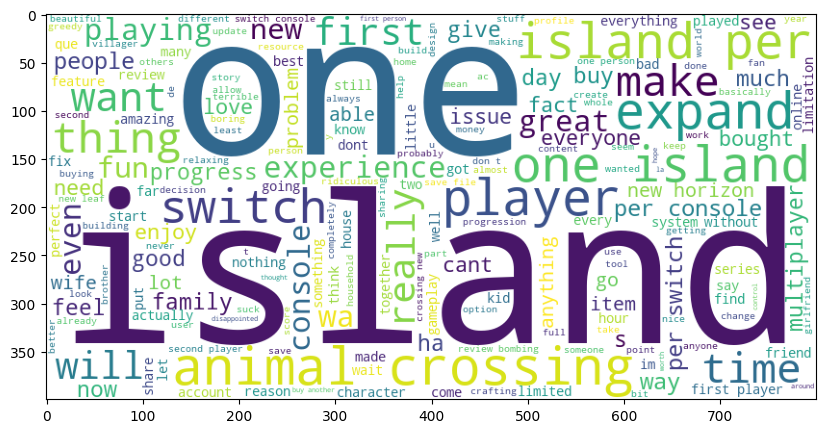

In [18]:
# Word cloud of most commonly used words for negative user reviews:
neg_user_review_text2 = " ".join(review[0] for review in user_clusters[0])

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(neg_user_review_text2)

# Display the generated word cloud
pyplot.figure(figsize=(10, 5))
pyplot.imshow(wc)
pyplot.show()


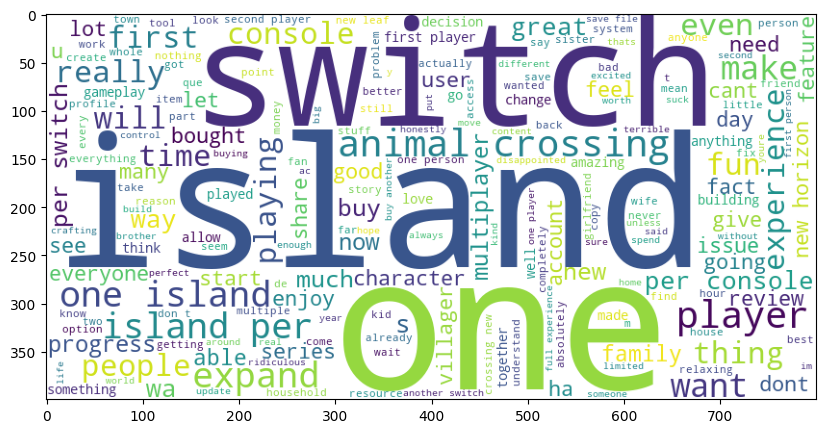

In [19]:
# Word cloud of most commonly used words for negative user reviews:
pos_user_review_text2 = " ".join(review[0] for review in user_clusters[1])

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(pos_user_review_text2)

# Display the generated word cloud
pyplot.figure(figsize=(10, 5))
pyplot.imshow(wc)
pyplot.show()

In [20]:
# The two clusters are similarly distinguished from each other like for Kmeans, but
# this time the cluster for lower-scored reviews have a more even distribution of frequency across
# words in the word cloud whereas the cluster for positive reviews were highly emphasized on the words
# "one" and "island".

In [21]:
# Now time for clustering based on PCA:

In [22]:
# To prepare for PCA, I will preprocess the text data to be represented entirely numerically
# using the TF-IDF algorithm.

corpus_cluster = [ x[0] for x in user_clusters[0] ] + [ x[0] for x in user_clusters[1] ]

    # The min_df parameter was set to ensure the vocabulary is not too limited, removing
    # words that don't appear within 1% of reviews.
vectorizer = TfidfVectorizer(min_df=.03)

    # Fit the TF-IDF algorithm onto the dataset:
tfidf_matrix = vectorizer.fit_transform(corpus_cluster)

    # Features of the dataset defined by TF-IDF:
vocabulary = vectorizer.get_feature_names_out()

    # Print the TF-IDF matrix:
tfidf_arr = tfidf_matrix.toarray()


# https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
# https://chatgpt.com/c/6753e835-4c68-8000-8c6d-0f56a9446cb2
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer

In [ ]:
print(len(tfidf_arr), len(corpus_cluster))
print(tfidf_arr)

2009 2009


In [23]:
print("Vocabulary of ", len(vocabulary), "unique words")
print(vocabulary)

Vocabulary of  316 unique words
['10' '60' 'able' 'about' 'absolutely' 'ac' 'access' 'account' 'actually'
 'again' 'all' 'allow' 'almost' 'already' 'also' 'always' 'am' 'amazing'
 'an' 'and' 'animal' 'another' 'any' 'anyone' 'anything' 'are' 'around'
 'at' 'back' 'bad' 'basically' 'be' 'beautiful' 'because' 'been' 'being'
 'best' 'better' 'big' 'bombing' 'bought' 'bug' 'build' 'building' 'but'
 'buy' 'buying' 'can' 'cant' 'change' 'character' 'choice' 'click' 'come'
 'completely' 'console' 'contains' 'content' 'control' 'coop' 'copy'
 'could' 'crafting' 'create' 'crossing' 'cute' 'day' 'de' 'decision'
 'design' 'different' 'disappointed' 'do' 'don' 'done' 'dont' 'each'
 'enjoy' 'enough' 'even' 'ever' 'every' 'everyone' 'everything' 'excited'
 'expand' 'experience' 'extremely' 'fact' 'family' 'fan' 'far' 'feature'
 'feel' 'file' 'find' 'first' 'fix' 'for' 'forward' 'friend' 'from' 'full'
 'fun' 'game' 'gameplay' 'get' 'getting' 'girlfriend' 'give' 'giving' 'go'
 'going' 'good' 'got' 'gr

In [ ]:
print(tfidf_arr.shape)
print(tfidf_arr)

(2009, 316)
<class 'list'>
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.12977462 0.06012959]
 [0.         0.         0.         ... 0.         0.13641102 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.07698399 0.        ]
 [0.         0.         0.         ... 0.         0.100799   0.        ]
 [0.10412587 0.         0.         ... 0.         0.10874984 0.15116399]]


In [25]:
# PCA to reduce the dimensionality of the features set up by TF-IDF
# X_O Is this really it??
pca = PCA(n_components=2)
data_pca = pca.fit_transform(tfidf_arr)

Cluster 0 contains 740 elements
(array([   0,    1,    2, ..., 2006, 2007, 2008]),)
Cluster 1 contains 1931 elements
(array([  15,   45,   47,   50,   67,   81,  115,  162,  183,  223,  228,
        239,  267,  272,  300,  310,  315,  320,  386,  410,  455,  517,
        566,  584,  714,  716,  737,  746,  805,  811,  828,  861,  887,
        897,  899,  910,  937,  984, 1009, 1031, 1037, 1040, 1055, 1065,
       1074, 1076, 1090, 1097, 1137, 1187, 1190, 1241, 1255, 1270, 1275,
       1287, 1301, 1344, 1407, 1434, 1454, 1495, 1544, 1588, 1590, 1600,
       1641, 1655, 1682, 1793, 1850, 1858, 1861, 1890, 1896, 1909, 1932,
       1992]),)


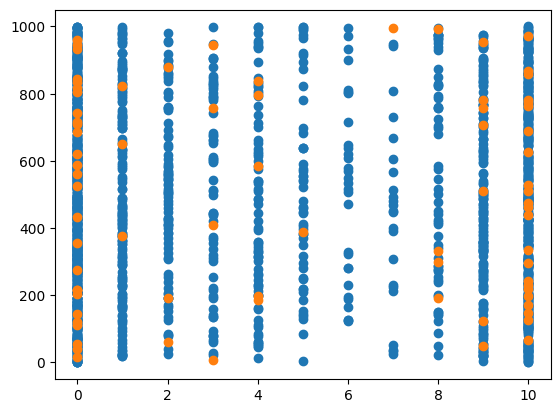

In [26]:
# Clustering from PCA: Part 1

# Algorithm used: KMeans
# Code taken and modified from Lab 10 tutorial.

# Define the model
model = KMeans(n_clusters=2)

# Fit model and predict clusters
yhat = model.fit_predict(data_pca)

# Retrieve unique clusters
clusters = unique(yhat)

for cluster in clusters:
	print("Cluster", cluster, f"contains {len(row_ix[0])} elements")
	row_ix = where(yhat == cluster)
	print(row_ix)
	
	# Since the clusters overlap quite a bit, I gave a random y-value for each dot on the scatterplot
	# to make the the clustering more distinguishable.
	pyplot.scatter(X[row_ix, 0], [random.randint(0,1000) for x in range(len(X[row_ix, 0][0]))])




Cluster 0 contains 78 elements
(array([   0,    1,    2, ..., 2006, 2007, 2008]),)
Cluster 1 contains 1931 elements
(array([  15,   45,   47,   50,   67,   81,  115,  162,  183,  223,  228,
        239,  267,  272,  300,  310,  315,  320,  386,  410,  455,  517,
        566,  584,  714,  716,  737,  746,  805,  811,  828,  861,  887,
        897,  899,  910,  937,  984, 1009, 1031, 1037, 1040, 1055, 1065,
       1074, 1076, 1090, 1097, 1137, 1187, 1190, 1241, 1255, 1270, 1275,
       1287, 1301, 1344, 1407, 1434, 1454, 1495, 1544, 1588, 1590, 1600,
       1641, 1655, 1682, 1793, 1850, 1858, 1861, 1890, 1896, 1909, 1932,
       1992]),)


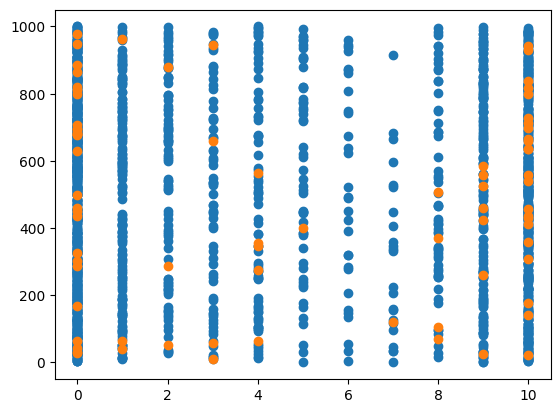

In [27]:
# Clustering from PCA: Part 2

# Algorithm used: Agglomerative Clustering
# Code taken and modified from Lab 10 tutorial.

# Define the model
model = AgglomerativeClustering(n_clusters=2)

# Fit model and predict clusters
yhat = model.fit_predict(data_pca)

# Retrieve unique clusters
clusters = unique(yhat)

for cluster in clusters:
	print("Cluster", cluster, f"contains {len(row_ix[0])} elements")
	row_ix = where(yhat == cluster)
	print(row_ix)
	
	# Since the clusters overlap quite a bit, I gave a random y-value for each dot on the scatterplot
	# to make the the clustering more distinguishable.
	pyplot.scatter(X[row_ix, 0], [random.randint(0,1000) for x in range(len(X[row_ix, 0][0]))])


In [28]:
# The clustering turned out similarly for Kmeans and Agglomerative when predicting based on
# the TF-IDF preprocessed and PCA-fit data.
# The first cluster is sparse compared to the second cluster with over a thousand samples.

# It is hard to read and understand these clusters, and I had trouble with setting up TF-IDF and
# PCA on a textual dataset attached to the numerical grades data; I didn't use the grades column
# of the reviews dataset at all.

# PCA may be useful if I found a way to convert the text and grade data to a purely numerical
# representation in another way. Perhaps if I were to do something like this again, I can find a
# way to tie the number representing a word's frequency across the different review strings with
# the grade the user attached to that review.
